# Coursework for BDML by 958804 

## Imports

In [8]:
import numpy as np
import skimage.feature
import tensorflow as tf
import matplotlib.pyplot as plt
# from imports
from sklearn.svm import SVC
from sklearn.cluster import KMeans as km
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix

## Image and Label Import and Transpostion
We transpose the data to be able to use it in the model fuction

In [9]:
train_image = np.load('trnImage.npy')
train_image = np.transpose(train_image,[3,0,1,2])
train_label = np.load('trnLabel.npy')
test_image = np.load('tstImage.npy')
test_image = np.transpose(test_image,[3,0,1,2])
test_label = np.load('tstLabel.npy')

## Train data shuffle
We have to shuffle the data so that the NN's don't optimise for the first image set it 
sees leading to biased results

In [10]:
indices = np.arange(train_image.shape[0])# 0..s
np.random.shuffle(indices)               # shuffled 0..s
train_image = train_image[indices,:,:,:]
train_label = train_label[indices,:]

# Convolutional Neural Network 

## Creation and Training

Epoch 1/35
1000/1000 [==============================] - 6s 6ms/step - loss: 2.0728 - acc: 0.2421 - val_loss: 1.7675 - val_acc: 0.3561
Epoch 2/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.6578 - acc: 0.3995 - val_loss: 1.4993 - val_acc: 0.4524
Epoch 3/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.4771 - acc: 0.4699 - val_loss: 1.4161 - val_acc: 0.4827
Epoch 4/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.3717 - acc: 0.5108 - val_loss: 1.2872 - val_acc: 0.5452
Epoch 5/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2832 - acc: 0.5414 - val_loss: 1.2094 - val_acc: 0.5775
Epoch 6/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.2095 - acc: 0.5705 - val_loss: 1.1450 - val_acc: 0.5898
Epoch 7/35
1000/1000 [==============================] - 5s 5ms/step - loss: 1.1531 - acc: 0.5901 - val_loss: 1.0649 - val_acc: 0.6253
Epoch 8/35
1000/1000 [==============================] - 5s 5ms

Text(0.5, 1.0, 'Loss Curves')

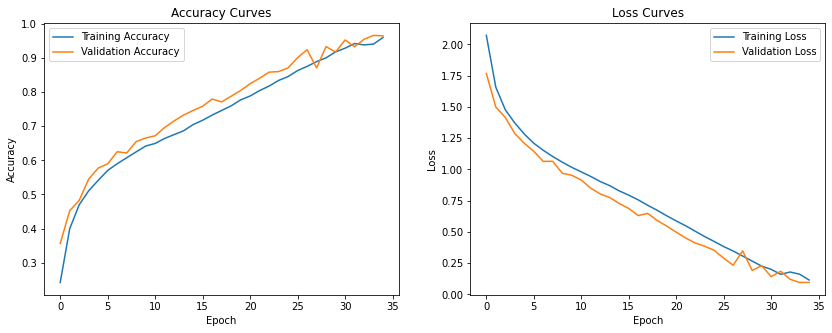

In [19]:
model = tf.keras.Sequential(layers=[
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.MaxPooling2D(10),
    tf.keras.layers.Dropout(0.005),
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.Dropout(0.005),
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.Conv2D(50,(3,3),strides=(1,1),padding='SAME',activation=tf.nn.elu),
    tf.keras.layers.Dropout(0.005),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])
model.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics='acc')

val = model.fit(train_image, train_label, batch_size=10,epochs=35,
               validation_data=(train_image,train_label))

print(val.history.keys())
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(val.history['acc'])
plt.plot(val.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(1,2,2)
plt.plot(val.history['loss'])
plt.plot(val.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.title('Loss Curves')

## Confusion matrix

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

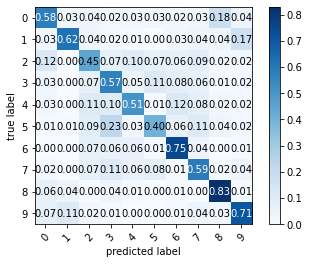

In [18]:
pred = np.argmax(model.predict(test_image), axis=-1)
cnf_matrix = confusion_matrix(y_true = test_label, y_pred = pred)
plot_confusion_matrix(conf_mat=cnf_matrix,colorbar=True,show_absolute=False,show_normed=True,class_names=np.unique(test_label))

# Neural Network

## Creation and Training

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 50)        1400      
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 50)        22550     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 50)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 3, 3, 50)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 450)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                4510      
Total params: 28,460
Trainable params: 28,460
Non-trainable params: 0
__________________________________________________

Text(0.5, 1.0, 'Loss Curves')

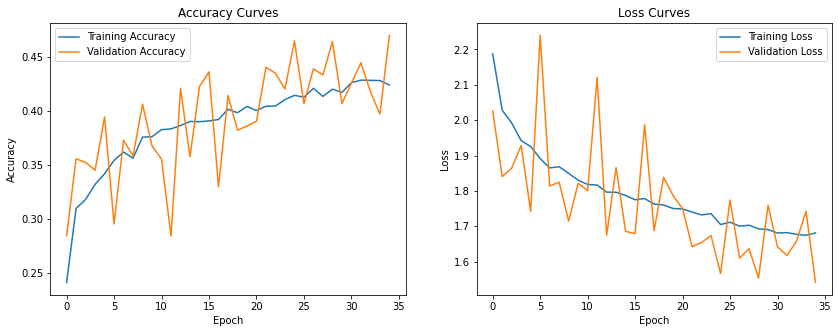

In [13]:
modelnn = tf.keras.Sequential(layers=[
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),
])
modelnn.compile(optimizer=tf.keras.optimizers.SGD(),
             loss=tf.keras.losses.SparseCategoricalCrossentropy(),
             metrics='acc')

val = modelnn.fit(train_image, train_label, batch_size=10,epochs=35,verbose=0,
               validation_data=(train_image,train_label))
model.summary()
prediction = model.predict(train_image)

print(val.history.keys())
plt.figure(1, figsize=(14,5))
plt.subplot(1,2,1)
plt.plot(val.history['acc'])
plt.plot(val.history['val_acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Training Accuracy','Validation Accuracy'])
plt.title('Accuracy Curves')

plt.subplot(1,2,2)
plt.plot(val.history['loss'])
plt.plot(val.history['val_loss'])
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Training Loss','Validation Loss'])
plt.title('Loss Curves')

# Confusion matrix

(<Figure size 432x288 with 2 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

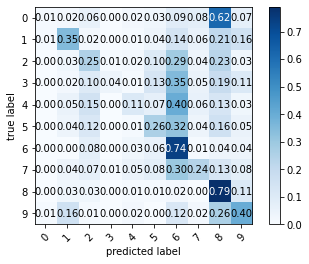

In [7]:
pred = np.argmax(modelnn.predict(test_image), axis=-1)
cnf_matrix = confusion_matrix(y_true = test_label, y_pred = pred)
plot_confusion_matrix(conf_mat=cnf_matrix,colorbar=True,show_absolute=False,show_normed=True,class_names=np.unique(test_label))